<a href="https://colab.research.google.com/github/paulapipkin/sales_predictions/blob/main/Sales_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Prediciton

- Paula Pipkin

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/BootCamp/PROJECT 1/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###Identify basic info: Nulls, Dtype, Columns and Rows 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###Checking for unique values

In [7]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

###Checking for completly duplicated rows

In [8]:
duplicate_test = df[df.duplicated() == True]
duplicate_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            0 non-null      object 
 1   Item_Weight                0 non-null      float64
 2   Item_Fat_Content           0 non-null      object 
 3   Item_Visibility            0 non-null      float64
 4   Item_Type                  0 non-null      object 
 5   Item_MRP                   0 non-null      float64
 6   Outlet_Identifier          0 non-null      object 
 7   Outlet_Establishment_Year  0 non-null      int64  
 8   Outlet_Size                0 non-null      object 
 9   Outlet_Location_Type       0 non-null      object 
 10  Outlet_Type                0 non-null      object 
 11  Item_Outlet_Sales          0 non-null      float64
dtypes: float64(4), int64(1), object(7)
memory usage: 0.0+ bytes


###Checking why fat_content has 5 different unique values 

In [9]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

###Fixing values for fat content

In [10]:
df= df.replace(to_replace={'low fat', 'LF'}, value='Low Fat')
df= df.replace(to_replace={'reg'}, value='Regular')
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [11]:
df['Outlet_Type'].unique() # checking this one too, but it looks ok

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

### Checking on which types of item have more missing weight


In [12]:
df_missing_weight = df[df['Item_Weight'].isnull()]
df_missing_weight.groupby('Item_Type').size()

Item_Type
Baking Goods             112
Breads                    47
Breakfast                 21
Canned                   110
Dairy                    116
Frozen Foods             138
Fruits and Vegetables    213
Hard Drinks               31
Health and Hygiene        90
Household                151
Meat                      88
Others                    32
Seafood                   13
Snack Foods              212
Soft Drinks               71
Starchy Foods             18
dtype: int64

####I thought I could check if there is missing values for Weight within an item identifier, so I could use the input to fill out missing inputs

In [13]:
sea_food_filter = df.loc[df['Item_Type']=='Seafood']
sea_food_filter.sort_values(by='Item_Identifier')


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7332,FDF33,7.97,Low Fat,0.036046,Seafood,107.5596,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
2761,FDF33,7.97,Low Fat,0.021531,Seafood,108.4596,OUT035,2004,Small,Tier 2,Supermarket Type1,3020.0688
8324,FDF33,7.97,Low Fat,0.021579,Seafood,105.9596,OUT045,2002,NaN,Tier 2,Supermarket Type1,2049.3324
4751,FDF33,NaN,Low Fat,0.000000,Seafood,109.4596,OUT027,1985,Medium,Tier 3,Supermarket Type3,1833.6132
3036,FDF33,7.97,Low Fat,0.021623,Seafood,107.6596,OUT018,2009,Medium,Tier 3,Supermarket Type2,1833.6132
...,...,...,...,...,...,...,...,...,...,...,...,...
1400,FDK45,11.65,Low Fat,0.033927,Seafood,111.5860,OUT045,2002,NaN,Tier 2,Supermarket Type1,3395.5800
1176,FDK45,NaN,Low Fat,0.059281,Seafood,111.5860,OUT019,1985,Small,Tier 1,Grocery Store,339.5580
6467,FDK45,11.65,Low Fat,0.033858,Seafood,113.3860,OUT046,1997,Small,Tier 1,Supermarket Type1,2603.2780
4952,FDK45,11.65,Low Fat,0.034050,Seafood,112.2860,OUT017,2007,NaN,Tier 2,Supermarket Type1,452.7440


In [14]:
baking_goods_filter = df.loc[df['Item_Type']=='Baking Goods']
baking_goods_filter.sort_values(by='Item_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5682,FDA11,NaN,Low Fat,0.043029,Baking Goods,94.7436,OUT027,1985,Medium,Tier 3,Supermarket Type3,1701.7848
2321,FDA11,7.75,Low Fat,0.043327,Baking Goods,95.6436,OUT045,2002,NaN,Tier 2,Supermarket Type1,1134.5232
6521,FDA11,7.75,Low Fat,0.043239,Baking Goods,92.5436,OUT046,1997,Small,Tier 1,Supermarket Type1,1701.7848
8316,FDA11,7.75,Low Fat,0.043483,Baking Goods,94.3436,OUT017,2007,NaN,Tier 2,Supermarket Type1,2363.5900
6604,FDA11,7.75,Low Fat,0.043415,Baking Goods,93.1436,OUT018,2009,Medium,Tier 3,Supermarket Type2,1418.1540
...,...,...,...,...,...,...,...,...,...,...,...,...
7127,FDZ60,20.50,Low Fat,0.119547,Baking Goods,108.9596,OUT049,1999,Medium,Tier 1,Supermarket Type1,539.2980
8133,FDZ60,20.50,Low Fat,0.119848,Baking Goods,109.4596,OUT018,2009,Medium,Tier 3,Supermarket Type2,431.4384
3811,FDZ60,NaN,Low Fat,0.208987,Baking Goods,106.0596,OUT019,1985,Small,Tier 1,Grocery Store,215.7192
2104,FDZ60,20.50,Low Fat,0.119339,Baking Goods,106.0596,OUT035,2004,Small,Tier 2,Supermarket Type1,970.7364


#### I tested 2 different products and found out that each item identifier has a unique weight, but some are missing that info, so I will apply that same value to the missing ones, 

since the weights are the same, I'm going to use the mean weight to fill up the null values in each item


In [15]:
mean_weight_per_item= df.groupby('Item_Identifier', as_index=False)['Item_Weight'].mean()
mean_weight_per_item.head(155) #I used 155 because I wanted to see item FDA11

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
150,FDA08,11.850
151,FDA09,13.350
152,FDA10,20.350
153,FDA11,7.750


In [16]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Identifier'].map(mean_weight_per_item.set_index('Item_Identifier')['Item_Weight']))
# From stackoverflow 'How to Fill Nulls with values in another dataframe in pandas: 
# df1['Col2'] = df1['Col2'].fillna(df1['Col1'].map(df2.set_index('Col1')['Col2']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###Missing only 4 weights now, Checking if the mean changed

In [17]:
mean_weight_per_item= df.groupby('Item_Identifier', as_index=False)['Item_Weight'].mean()
mean_weight_per_item.head(155)

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
150,FDA08,11.850
151,FDA09,13.350
152,FDA10,20.350
153,FDA11,7.750


4 out 8523 = 0,04% so I will drop those 4 lines


In [18]:
df = df.dropna(subset=['Item_Weight'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


###I'm going to use the same concept to the missing values for outlet size, since outlet identifier is unique and should have the same value for size


- Testing if hipotese is true (outlet size unique/outlet_id)


In [19]:
df.sort_values(by='Outlet_Identifier') #I can see that for each ID I have the same Size

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3227,NCH06,12.300,Low Fat,0.128136,Household,248.3460,OUT010,1998,NaN,Tier 3,Grocery Store,985.3840
2170,FDH10,21.000,Low Fat,0.082526,Snack Foods,191.8478,OUT010,1998,NaN,Tier 3,Grocery Store,774.9912
4265,FDS40,15.350,Low Fat,0.023466,Frozen Foods,35.2190,OUT010,1998,NaN,Tier 3,Grocery Store,36.6190
3216,DRI37,15.850,Low Fat,0.180097,Soft Drinks,57.3904,OUT010,1998,NaN,Tier 3,Grocery Store,117.1808
2172,FDJ44,12.300,Regular,0.177970,Fruits and Vegetables,173.1396,OUT010,1998,NaN,Tier 3,Grocery Store,697.7584
...,...,...,...,...,...,...,...,...,...,...,...,...
3939,FDO13,7.865,Low Fat,0.061155,Breakfast,165.3526,OUT049,1999,Medium,Tier 1,Supermarket Type1,1151.1682
3942,FDX11,16.000,Regular,0.106918,Baking Goods,183.5634,OUT049,1999,Medium,Tier 1,Supermarket Type1,4725.8484
3943,NCW41,18.000,Low Fat,0.000000,Health and Hygiene,158.0604,OUT049,1999,Medium,Tier 1,Supermarket Type1,3327.6684
7546,FDO52,11.600,Regular,0.077285,Frozen Foods,172.4106,OUT049,1999,Medium,Tier 1,Supermarket Type1,4277.7650


Checking for 1 item


In [20]:
test_1_outlet = df.loc[df['Outlet_Identifier']=='OUT010']
test_1_outlet

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


###the issue here is different, specific outlets don't have any entry on the outlet size, so I can't use one value to copy to other rows, because there is no value at all 


checking how the category is spread out

In [21]:
df.groupby(by=['Outlet_Size'], dropna=False, as_index=False).size()

,Outlet_Size,size
0,High,932
1,Medium,2790
2,Small,2387
3,NaN,2410


I will check how many store have their size missing

In [22]:
missing_size = df.loc[df['Outlet_Size'].isna()]
missing_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 3 to 8519
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            2410 non-null   object 
 1   Item_Weight                2410 non-null   float64
 2   Item_Fat_Content           2410 non-null   object 
 3   Item_Visibility            2410 non-null   float64
 4   Item_Type                  2410 non-null   object 
 5   Item_MRP                   2410 non-null   float64
 6   Outlet_Identifier          2410 non-null   object 
 7   Outlet_Establishment_Year  2410 non-null   int64  
 8   Outlet_Size                0 non-null      object 
 9   Outlet_Location_Type       2410 non-null   object 
 10  Outlet_Type                2410 non-null   object 
 11  Item_Outlet_Sales          2410 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 244.8+ KB


In [23]:
missing_size['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [24]:
df.groupby('Outlet_Identifier', as_index=False).size() # to see how representative in data, were each store

,Outlet_Identifier,size
0,OUT010,555
1,OUT013,932
2,OUT017,926
3,OUT018,928
4,OUT019,527
5,OUT027,932
6,OUT035,930
7,OUT045,929
8,OUT046,930
9,OUT049,930


3 stores out of 10 have no size entry, the categories are well spreadout I will fill out the missing values with 'Medium" and keep my eye on the next steps, I believe the size of the store should be relevant for the sales prediction, but at this point I can't think of a better way to predict the size of those 3 stores

In [25]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


###8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [26]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Part 3 - Vizualization 

checking a general correlation between the numerical features

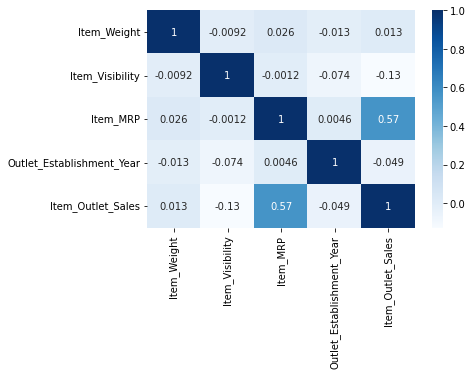

In [27]:
corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot=True);

I'll filter the items by category and see how this affects they correlation starting with the category with more items

In [28]:
df.groupby('Item_Type')['Item_Identifier'].nunique().sort_values()

Item_Type
Seafood                   10
Breakfast                 20
Others                    30
Starchy Foods             30
Hard Drinks               40
Breads                    45
Meat                      80
Soft Drinks               80
Health and Hygiene        95
Baking Goods             118
Canned                   120
Dairy                    124
Frozen Foods             154
Household                170
Snack Foods              219
Fruits and Vegetables    220
Name: Item_Identifier, dtype: int64

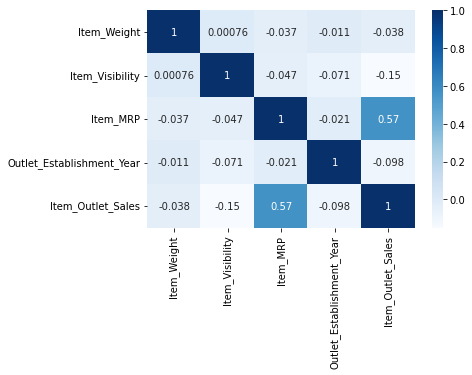

In [29]:
df_type_fruits = df.loc[df['Item_Type']=='Fruits and Vegetables']
corr_perType = df_type_fruits.corr()
sns.heatmap(corr_perType, cmap='Blues', annot=True);

I thought that item visibility would have a positive correlation with sales, but that was not confirmed by the heat map

Next I will check the distribution of the sales per location of the stores

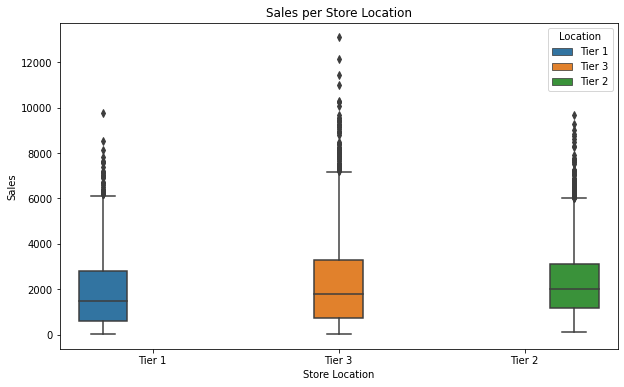

In [30]:
plt.figure(figsize=(10,6));
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Location_Type', data=df);
plt.legend(title='Location')
plt.xlabel('Store Location')
plt.ylabel('Sales')
plt.title('Sales per Store Location');

Tier 3 seems to be doing slitgly better

Let's check for the most expensives categories

In [31]:
mrp_type = df.groupby('Item_Type', as_index=False)['Item_MRP'].mean()


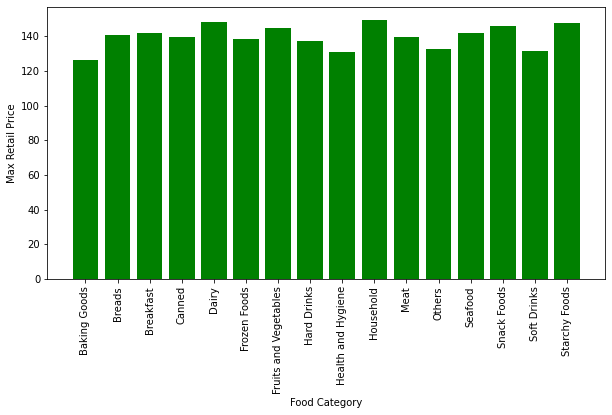

In [32]:
fig = plt.figure(figsize = (10, 5))
plt.bar(mrp_type['Item_Type'], mrp_type['Item_MRP'],color='green')
plt.xlabel('Food Category')
plt.ylabel('Max Retail Price')
plt.xticks(rotation=90);


Let's check the MRP distribution




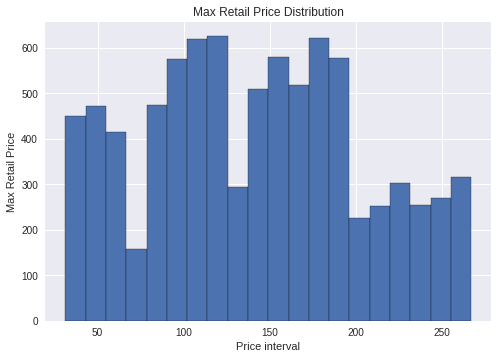

In [33]:
plt.style.use('seaborn')
df['Item_MRP'].hist(bins=20, edgecolor='black');
plt.ylabel('Max Retail Price')
plt.xlabel('Price interval')
plt.title('Max Retail Price Distribution');


We might need to evaluate MRP per item ID or per type to make this data useful

now let's evaluate sales per store

In [34]:
store_filter = df.groupby('Outlet_Identifier', as_index=False)['Item_Outlet_Sales'].mean().sort_values(by='Item_Outlet_Sales')

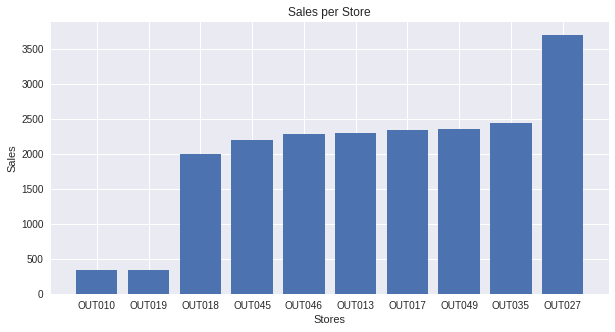

In [35]:
fig = plt.figure(figsize=(10,5))
plt.bar(store_filter['Outlet_Identifier'],store_filter['Item_Outlet_Sales'],data=store_filter)
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.title('Sales per Store');


We should further evaluate why the difference between OUT010, OUT019,OUT027




As we have seen before OUT010, OUT019 have less sales inputs, maybe this difference affected the mean value,  but OUT027 have about the same as the other stores:

In [36]:
df.groupby('Outlet_Identifier', as_index=False).size().sort_values('size')

,Outlet_Identifier,size
4,OUT019,527
0,OUT010,555
2,OUT017,926
3,OUT018,928
7,OUT045,929
6,OUT035,930
8,OUT046,930
9,OUT049,930
1,OUT013,932
5,OUT027,932


Trend Vizualization
1. let's see how the top 2 items with more entries sell in different stores

In [39]:
df_items = df['Item_Identifier'].value_counts()
df_items.head()

FDG33    10
FDW13    10
FDV60     9
FDU12     9
FDX20     9
Name: Item_Identifier, dtype: int64

In [83]:
top1_FDG33 = df.loc[df['Item_Identifier'] == 'FDG33',:].sort_values(by='Outlet_Identifier')
top2_FDW13 = df.loc[df['Item_Identifier'] == 'FDW13',:].sort_values(by='Outlet_Identifier')


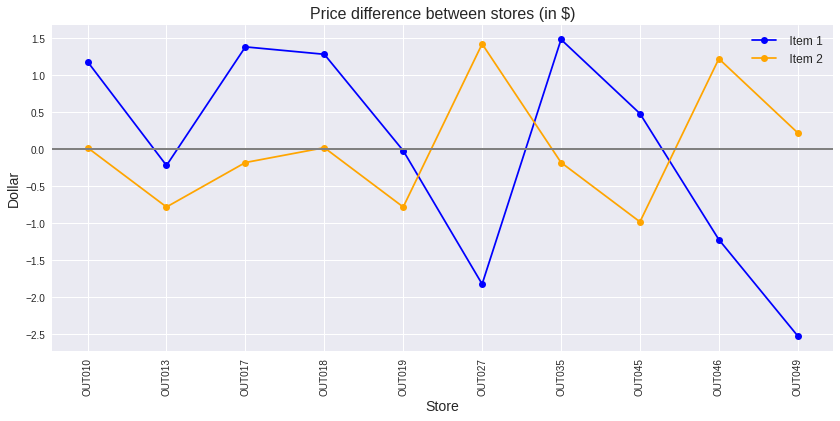

In [91]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize =(14,6))
axes.plot(top1_FDG33['Outlet_Identifier'],(top1_FDG33['Item_MRP']- top1_FDG33['Item_MRP'].mean()), color='blue', marker='o', label= ' Item 1' )
axes.plot(top2_FDW13['Outlet_Identifier'],(top2_FDW13['Item_MRP']- top2_FDW13['Item_MRP'].mean()), color='orange', marker='o', label= ' Item 2' )
axes.axhline(0, color='gray', linewidth=2)
plt.title('Price difference between stores (in $)', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Dollar', fontsize = 14)
plt.xlabel('Store', fontsize = 14);

- Item 1 can vary up to $3.5 dollars from 1 store to another, 
- Although, the higher prices don't always happen at the same store.
- Store 027 seems to be always out of the trend.



still using the top 2 items, can we see a correlation between its sales and the different prices?


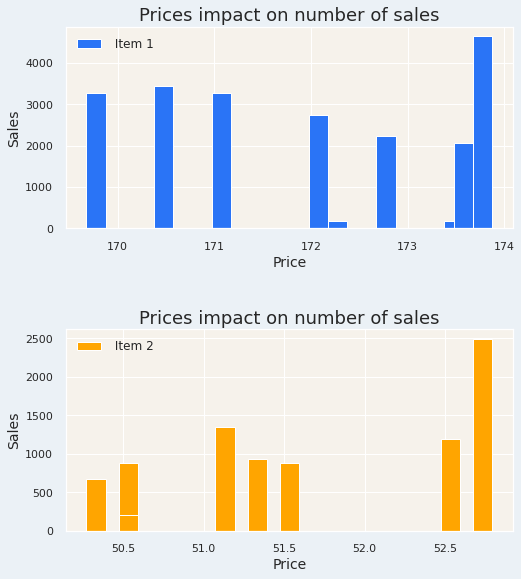

In [155]:

fig, axes = plt.subplots(ncols=1, nrows=2, figsize =(8,14))
fig.subplots_adjust(wspace=0.5, hspace=0.5, bottom=1, top= 1.5)
fig.set_facecolor('#ebf1f6')

axes[0].set_facecolor('#f6f2eb')
axes[1].set_facecolor('#f6f2eb')

axes[0].bar(top1_FDG33['Item_MRP'],top1_FDG33['Item_Outlet_Sales'], color='#2a74f6', label= ' Item 1', width=0.2 )
axes[1].bar(top2_FDW13['Item_MRP'],top2_FDW13['Item_Outlet_Sales'], color='orange',  label= ' Item 2' , width=0.12 )

axes[0].set_title('Prices impact on number of sales', fontsize=18)
axes[1].set_title('Prices impact on number of sales', fontsize=18)
axes[0].legend(fontsize=12)
axes[1].legend(fontsize=12)

axes[0].set_xlabel('Price', fontsize = 14)
axes[0].set_ylabel('Sales', fontsize = 14)
axes[1].set_xlabel('Price', fontsize = 14)
axes[1].set_ylabel('Sales', fontsize = 14);

Having a lower price do not make your sales higher
